<a href="https://colab.research.google.com/github/bimal-bp/Text_generation__rnn-LSTM-.ipynb/blob/ML_MODELS/Text_generation__rnn(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libriess
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import time
import pathlib
import os

In [ ]:
import tensorflow as tf
import pathlib  # Import the pathlib module

cache_dir = './tmp'
dataset_file_name = 'shakespeare.txt'
dataset_file_origin = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'

dataset_file_path = tf.keras.utils.get_file(
    fname=dataset_file_name,
    origin=dataset_file_origin,
    cache_dir=pathlib.Path(cache_dir).absolute()
)

print(dataset_file_path)


1115394/1115394 [==============================] - 0s 0us/step
/tmp/.keras/datasets/shakespeare.txt


In [ ]:
# Reading the database file.
text = open(dataset_file_path, mode='r').read()

print('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [ ]:
some=text[:250]
# Split the text into lines
lines = some.split('\n')

# Print each line
for line in lines:
    print(line)


First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [ ]:
# the unique charcters in the file
vocab=sorted(set(text))
print('{} unique characterstics '.format(len(vocab)))
print('vocab:',vocab)

65 unique characterstics 
vocab: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
# vectorize the text
# map charcters to their indices i vocabulary
# Sample vocabulary (replace with your actual vocabulary)

char2index = {char: index for index, char in enumerate(vocab)}
print('{')
for char, index in list(char2index.items())[:20]:
    print('{:4s}:{:3d},'.format(repr(char), index))
print('...\n')


{
'\n':  0,
' ' :  1,
'!' :  2,
'$' :  3,
'&' :  4,
"'" :  5,
',' :  6,
'-' :  7,
'.' :  8,
'3' :  9,
':' : 10,
';' : 11,
'?' : 12,
'A' : 13,
'B' : 14,
'C' : 15,
'D' : 16,
'E' : 17,
'F' : 18,
'G' : 19,
...



In [ ]:
# map charcter indices to charcters from vocabulary
index2char = np.array(vocab)
print(index2char)

['\n' ' ' '!' '$' '&' "'" ',' '-' '.' '3' ':' ';' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [ ]:
# conver chars in text to indices

text_as_int=np.array([char2index[char] for char in text])
print('text_as_int length :{}'.format(len(text_as_int)))
print('{}-->{}'.format(repr(text[:15]),repr(text_as_int[:15])))


text_as_int length :1115394
'First Citizen:\n'-->array([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0])


In [ ]:
# creating training sequence
# the max length sentence we want for a single input

sequence_length=100
examples_per_epoch=len(text)//(sequence_length+1)
print('example_per_epoch:',examples_per_epoch)

example_per_epoch: 11043


In [ ]:
# Create training dataset.
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for char in char_dataset.take(5):
    print(index2char[char.numpy()])

F
i
r
s
t


In [ ]:
# generate batched sequnces out_char_dataset
sequences=char_dataset.batch(sequence_length+1,drop_remainder=True)
# sequence size
print('sequences count:{}'.format(len(list(sequences.as_numpy_iterator()))))

for item in sequences.take(3):
  print(repr(''.join(index2char[item.numpy()])))

sequences count:11043
'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"


In [ ]:
def split_input_target(chunk):
  input_text=chunk[:-1]
  target_text=chunk[1:]
  return input_text,target_text

In [ ]:
dataset=sequences.map(split_input_target)
print('dataset size:{}'.format(len(list(dataset.as_numpy_iterator()))))


dataset size:11043


In [ ]:
for input_example,target_example in dataset.take(1):
  print('input sequence size:',repr(len(input_example.numpy())))
  print('Target sequence size:',repr(len(target_example.numpy())))
  print('***************')
  print('input:',repr(''.join(index2char[input_example.numpy()])))
  print('Target:',repr(''.join(index2char[target_example.numpy()])))

input sequence size: 100
Target sequence size: 100
***************
input: 'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [ ]:
for i,(input_idx,target_idx) in enumerate(zip(input_example[:5],target_example[:5])):
  print('step{:2d}'.format(i))
  print('input:{}({:s})'.format(input_idx,repr(index2char[input_idx])))
  print('executed output:{}({:s})'.format(target_idx,repr(index2char[target_idx])))

step 0
input:18('F')
executed output:47('i')
step 1
input:47('i')
executed output:56('r')
step 2
input:56('r')
executed output:57('s')
step 3
input:57('s')
executed output:58('t')
step 4
input:58('t')
executed output:1(' ')


In [ ]:
# splituing traing into bateches
BATCH_SIZE=64

BUFFER_SIZE=10000

dataset=dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE,drop_remainder=True)

dataset

<_BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [ ]:
print('Batched datset size:{}'.format(len(list(dataset.as_numpy_iterator()))))

Batched datset size:172


In [ ]:
for input_text, target_text in dataset.take(1):
  print('1st batch: input_text:', input_text)
  print()
  print('1st batch: target_text:', target_text)


1st batch: input_text: tf.Tensor(
[[50  1 58 ... 26 39 63]
 [57 43  1 ...  1 52 53]
 [53 58 43 ... 57 46 39]
 ...
 [58 39 49 ... 40 50 43]
 [58  0 32 ... 46 39 60]
 [54 47 58 ... 50 50  1]], shape=(64, 100), dtype=int64)

1st batch: target_text: tf.Tensor(
[[ 1 58 46 ... 39 63  6]
 [43  1 59 ... 52 53  1]
 [58 43 52 ... 46 39 50]
 ...
 [39 49 43 ... 50 43 57]
 [ 0 32 53 ... 39 60 43]
 [47 58 39 ... 50  1 46]], shape=(64, 100), dtype=int64)


In [ ]:
# build the model
tmp_vocab_size=10
tmp_embedding_size=5
tmp_input_length=8
tmp_batch_size=2

tmp_model=tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
    input_dim=tmp_vocab_size,
    output_dim=tmp_embedding_size,
    input_length=tmp_input_length
))


tmp_input_array=np.random.randint(
    low=0,
    high=tmp_vocab_size,
    size=(tmp_batch_size,tmp_input_length)
)

tmp_model.compile('rmsprop','mse')
tmp_output_array=tmp_model.predict(tmp_input_array)
print('tmp_input_array shape:',tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print('*******************')
print('tmp_output_array shape:',tmp_output_array.shape)
print(tmp_output_array)

1/1 [==============================] - 0s 167ms/step
tmp_input_array shape: (2, 8)
tmp_input_array:
[[0 5 4 0 4 8 6 4]
 [0 8 5 3 3 3 2 3]]
*******************
tmp_output_array shape: (2, 8, 5)
[[[ 0.00762153  0.00233106 -0.03878095  0.02581208 -0.01545614]
  [ 0.00901303 -0.01953213 -0.01972683 -0.03685208 -0.01424683]
  [-0.01205789 -0.04537904 -0.01868731 -0.0072579  -0.00391892]
  [ 0.00762153  0.00233106 -0.03878095  0.02581208 -0.01545614]
  [-0.01205789 -0.04537904 -0.01868731 -0.0072579  -0.00391892]
  [ 0.01890477  0.032906    0.01457625 -0.01711503 -0.03684989]
  [ 0.04890524  0.03763841 -0.01704351  0.00122295  0.02533739]
  [-0.01205789 -0.04537904 -0.01868731 -0.0072579  -0.00391892]]

 [[ 0.00762153  0.00233106 -0.03878095  0.02581208 -0.01545614]
  [ 0.01890477  0.032906    0.01457625 -0.01711503 -0.03684989]
  [ 0.00901303 -0.01953213 -0.01972683 -0.03685208 -0.01424683]
  [-0.00764783  0.03832748  0.03062992  0.0406027  -0.00854633]
  [-0.00764783  0.03832748  0.0306299

In [ ]:
# length of vocabulary in chars
vocab_size=len(vocab)
embedding_dim=256
rnn_units=1024

In [ ]:
def build_model(vocab_size,embedding_dim,rnn_units,batch_size):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size,None]
  ))
  model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
  ))

  model.add(tf.keras.layers.Dense(vocab_size))

  return model

In [ ]:
model=build_model(vocab_size,embedding_dim,rnn_units,BATCH_SIZE)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           16640     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 65)            66625     
                                                                 
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


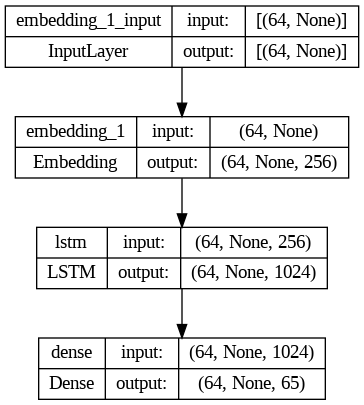

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True
)

In [ ]:
# try another model
for input_example_batch,target_example_batch in dataset.take(1):
  example_batch_predictions=model(input_example_batch)
  print(example_batch_predictions.shape,"# (batch_size,sequence_length,vocab_size)")

(64, 100, 65) # (batch_size,sequence_length,vocab_size)


In [ ]:
print('prediction for the 1st letter of the batch 1st sequences:')
print(example_batch_predictions[0,0])

prediction for the 1st letter of the batch 1st sequences:
tf.Tensor(
[-1.3374280e-03  6.0955808e-04 -1.8946030e-03 -2.2991444e-03
 -4.9947470e-04 -2.3877791e-03 -5.9508753e-04 -6.2510464e-03
 -4.5707063e-03  2.2155817e-03  3.5125336e-03 -2.6415726e-03
  1.8983127e-03 -1.9093406e-03 -2.9857752e-03  5.4636933e-03
  3.3465205e-03  2.5780965e-04 -2.8075872e-03 -2.0078043e-03
  4.1747307e-03 -6.0831727e-03 -4.0097651e-03 -2.9311045e-03
 -4.1758302e-03  4.2488067e-03  5.2731484e-05  8.6131349e-04
  2.0226464e-04  4.6305940e-03 -8.0816802e-03  2.0421487e-03
 -5.9140511e-03 -4.4921908e-05 -6.9186593e-05 -2.6859669e-03
 -3.9334958e-03  5.4985387e-03 -2.0172952e-03  1.3002101e-03
  9.7313162e-04 -2.1637920e-03  9.0114726e-03 -3.2603024e-03
  9.6901809e-04 -1.3599377e-03  4.1313606e-04  4.7445903e-03
 -4.1855592e-03  4.6452926e-03 -9.2639751e-04 -1.2970975e-03
 -1.7798333e-03  2.9881743e-03  7.7027711e-04 -7.2241956e-03
 -4.5236740e-03 -2.0322152e-03 -2.3638732e-03  4.7525102e-03
 -3.8654751e-03 

In [ ]:
temp_logits=[
    [-0.95,0,0.95]
];


tmp_samples=tf.random.categorical(
    logits=temp_logits,
    num_samples=5
)
print(tmp_samples)

tf.Tensor([[2 2 1 2 2]], shape=(1, 5), dtype=int64)


In [ ]:
sampled_indices=tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)
sampled_indices.shape

TensorShape([100, 1])

In [ ]:
sampled_indices=tf.squeeze(
    input=sampled_indices,
    axis=-1

).numpy()
sampled_indices.shape

(100,)

In [ ]:
sampled_indices

array([50, 45, 54,  5, 62, 62, 56,  7,  4, 24,  3, 56, 28, 32, 38, 63, 39,
       13, 46, 51, 10, 64,  5,  9, 37, 39, 48,  6, 54,  7, 42, 39, 16,  5,
        0,  0,  2,  5, 40,  6,  6, 37, 41,  8,  1, 55, 33, 20, 14, 17, 48,
       41, 18, 58,  6, 50, 12, 12, 29, 11, 44, 61,  3,  4, 25, 58,  3, 60,
       52, 41,  7, 25, 40, 11, 49, 10, 57, 38,  6, 32, 52, 28, 55, 62, 34,
        0, 24, 30, 12, 36, 15, 16, 28,  4, 14, 35, 58,  3, 24, 56])

In [ ]:
print('input :\n',repr(''.join(index2char[input_example_batch[0]])))
print("*******************")
print('next char prediction;\n',repr(''.join(index2char[sampled_indices])))

input :
 "eror;\nFor now he lives in fame, though not in life.\nI'll tell you what, my cousin Buckingham,--\n\nBUC"
*******************
next char prediction;
 "lgp'xxr-&L$rPTZyaAhm:z'3Yaj,p-daD'\n\n!'b,,Yc. qUHBEjcFt,l??Q;fw$&Mt$vnc-Mb;k:sZ,TnPqxV\nLR?XCDP&BWt$Lr"


In [ ]:
for i, (input_idx, sample_idx) in enumerate(zip(input_example_batch[0][:5], sampled_indices[:5])):
    print('Prediction {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  next predicted: {} ({:s})'.format(target_idx, repr(index2char[sample_idx])))

Prediction  0
  input: 43 ('e')
  next predicted: 1 ('l')
Prediction  1
  input: 56 ('r')
  next predicted: 1 ('g')
Prediction  2
  input: 53 ('o')
  next predicted: 1 ('p')
Prediction  3
  input: 56 ('r')
  next predicted: 1 ("'")
Prediction  4
  input: 11 (';')
  next predicted: 1 ('x')


In [ ]:
# train the model
def loss(labels,logits):
  return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
  )
example_batch_loss=loss(target_example_batch,example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 65)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.174136


In [ ]:
adam_optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [ ]:
# checkpont
checkpoint_dir='tmp/checkpoints'
os.makedirs(checkpoint_dir,exist_ok=True)

checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt_{epoch}')
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [ ]:
EPOCHS=1
history=model.fit(
    x=dataset,
    epochs=EPOCHS,
    callbacks=[
        checkpoint_callback
    ]
)

172/172 [==============================] - 1638s 9s/step - loss: 1.9164


In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

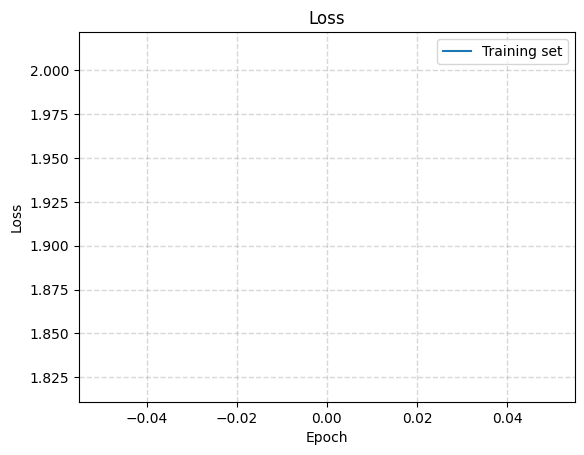

In [ ]:
render_training_history(history)

Generate text

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'tmp/checkpoints/ckpt_1'

In [ ]:
simplified_batch_size = 1

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([simplified_batch_size, None]))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (1, None, 256)            16640     
                                                                 
 lstm_1 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_1 (Dense)             (1, None, 65)             66625     
                                                                 
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# num_generate
# - number of characters to generate.
#
# temperature
# - Low temperatures results in more predictable text.
# - Higher temperatures results in more surprising text.
# - Experiment to find the best setting.
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)

    # Converting our start string to numbers (vectorizing).
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(index2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [ ]:
# Generate the text with default temperature (1.0).
print(generate_text(model, start_string=u"ROMEO: "))

ROMEO: LYUZZKUMV$FU$QzQ3CzV&X3SD$zD&Q!&zqxzQ$MZY3X$3V3ZKZZQDZU&LCUZz&FZ$zGD3Q&Y3&3j$CkJz3zv&MUVKx3Knz&zQzL3&x&3V3D?Zz&EKjxVJzzQL$B3z333$3IWZD$&qG3Yz$Zzz$3NMK3S$D&FKK33&&JFJLK&&VUQYQX&vzKYqX&K&KV3KJzSJQ&3VXN$zJ3JYDHBPLXYYzJJj$&&$Q$ZQYTX$KV&Jz$&Jz&u&XzD3Z3&&$$j&DQ33Q&Uz$3zKQzD3J3CVNz3zZU!SUJWzQJz&Q$zj$KRHCEvZZD3zEJN?$ZxQHYzzVzKZz3$FQU$xzxV$&$3ZX&KNZ&X3xJZ&&J$zzCzQWS&BX&DKCQ?Zx$zY?K3K$JJ3$HE3zQzZ3&x&CU&$&$&GSKz$x$YNKQQ&&KKNY3zVZY&J3z&&$zzMz&Z3SI&XZz&YDzA3JXzKZzDVEKQ$HZNJUZHVEE?GVV&KQ&YL&ZEOz$DZNzZZX&jJ$3JVXjZEdQVO;z33UUKzY3QZJzXC3KZLMMH3Y&XzQDQHPK3YzzXY&V;3Z$FZQZ3F&Xz$z&zzX&N&&&$$$VZzzJDQSU&&JxQ&Uz3XTDQ$KKC&E$&$QU&ZQF$VzW3z&KJ?CLz&XQJzKJ3$xVYKZ$3LKMYvGQz&Y&$VZVQj$H$Q3&&KjZMX$zQYP$;C$jYDJ&z$k3&V$&3RMV$&$P&$YPZ$KM3X&&&3Zqx3FZ$K3x$$zCUCJ$$$3xzzzz$$QExVJJJzjxzV3&3&XKv33zzjQzQJXZZE$Bq$JQzQU$ULXz$JZKZ$KQQ3VYVK3KSX3$KV&xM&SFHVYKKDKx$&VOV3Xxq3$3j3QKV3$UKJz$UCQK?&&z$$$$E3$z$33Q3$K;Kz&3$HzVZz$X3X?VSHQKVKUGJ3JV3D3HDWJzQ$LFvXCz&zPJQUB&XVQ&xH3$KQJHz3Q&z&&xSU$Dz&DV3QKX&Qzz3jxDzzVJ$$Qx3SHXzQU$zYHz3zK3&K